In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('../titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

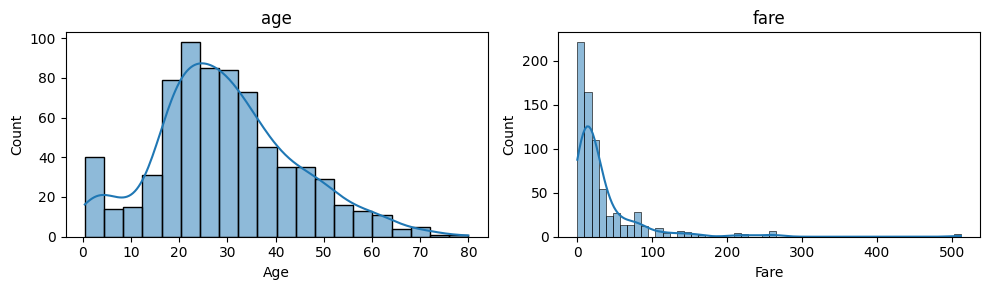

In [5]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True)
plt.title('age')


# plt.figure(figsize=(8,3))
plt.subplot(1,2,2)
sns.histplot(df['Fare'], kde=True)
plt.title('fare')
plt.tight_layout()
plt.show()


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,[0]], test_size=0.2, random_state=42)
wdt = DecisionTreeClassifier()
wdt.fit(x_train, y_train)
y_pred = wdt.predict(x_test)
accuracy_score(y_pred, y_test)

0.6153846153846154

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer


In [8]:
kage = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', quantile_method='averaged_inverted_cdf')
kfare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', quantile_method='averaged_inverted_cdf')

In [9]:
trf = ColumnTransformer(transformers=[
    ('age', kage, [0]),
    ('fare', kfare, [1])
], remainder='passthrough')

In [10]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [11]:
trf.named_transformers_['age'].bin_edges_

array([array([ 1., 11., 17., 20., 24., 28., 30., 35., 39., 48., 62.])],
      dtype=object)

In [12]:
trf.named_transformers_['fare'].bin_edges_

array([array([  0.    ,   7.7417,   7.925 ,   8.6625,  10.5   ,  14.4542,
               22.525 ,  29.125 ,  39.    ,  57.9792, 512.3292])         ],
      dtype=object)

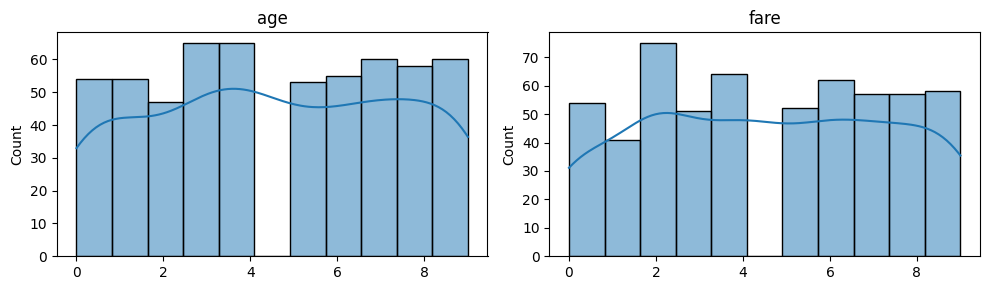

In [17]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(x_train_trf[:,0], kde=True)
plt.title('age')


# plt.figure(figsize=(8,3))
plt.subplot(1,2,2)
sns.histplot(x_train_trf[:,1], kde=True)
plt.title('fare')
plt.tight_layout()
plt.show()
